# Plotting
Author: Javier Duarte

## Plotting in `pyROOT`
Here we do standard plotting in `pyROOT`

Welcome to JupyROOT 6.14/04


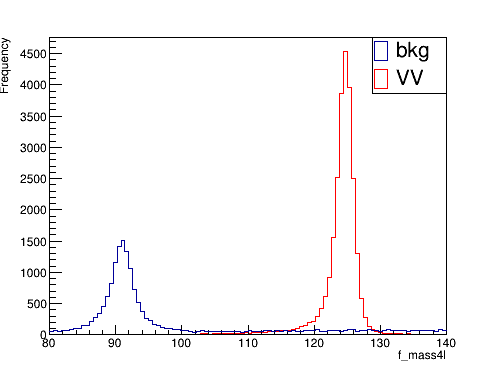

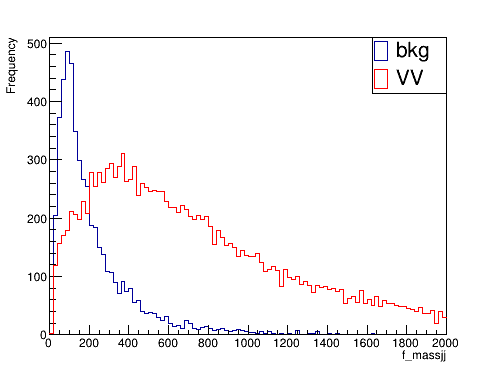

In [1]:
import ROOT as rt
rt.gStyle.SetOptTitle(0)
rt.gStyle.SetOptStat(0)

treename = 'HZZ4LeptonsAnalysisReduced'

tfile = {}
tree = {}
hist = {}
tfile['VV'] = rt.TFile.Open('data/ntuple_4mu_VV.root')
tfile['bkg'] = rt.TFile.Open('data/ntuple_4mu_bkg.root')
tree['VV'] = tfile['VV'].Get(treename)
tree['bkg'] = tfile['bkg'].Get(treename)

hist['VV_f_mass4l'] = rt.TH1D('VV_f_mass4l','VV_f_mass4l',100, 80, 140)
hist['bkg_f_mass4l'] = rt.TH1D('bkg_f_mass4l','bkg_f_mass4l',100, 80, 140)

tree['VV'].Project('VV_f_mass4l','f_mass4l') 
tree['bkg'].Project('bkg_f_mass4l','f_mass4l')

hist['VV_f_massjj'] = rt.TH1D('VV_f_massjj','VV_f_massjj',100, 0, 2000)
hist['bkg_f_massjj'] = rt.TH1D('bkg_f_massjj','bkg_f_massjj',100, 0, 2000)

tree['VV'].Project('VV_f_massjj','f_massjj')
tree['bkg'].Project('bkg_f_massjj','f_massjj')

hist['VV_f_mass4l'].SetLineColor(rt.kRed)
hist['VV_f_massjj'].SetLineColor(rt.kRed)

%jsroot off
c1 = rt.TCanvas('c1','c1',500,400)
hist['VV_f_mass4l'].GetXaxis().SetTitle('f_mass4l')
hist['VV_f_mass4l'].GetYaxis().SetTitle('Frequency')
hist['VV_f_mass4l'].Draw('hist')
hist['bkg_f_mass4l'].Draw('same')


legend = rt.TLegend(0.75,0.75,0.9,0.9)
legend.AddEntry(hist['bkg_f_mass4l'], ' bkg', 'f')
legend.AddEntry(hist['VV_f_mass4l'], ' VV', 'f')
legend.Draw()

c1.Draw()

c2 = rt.TCanvas('c2','c2',500,400)
hist['bkg_f_massjj'].GetXaxis().SetTitle('f_massjj')
hist['bkg_f_massjj'].GetYaxis().SetTitle('Frequency')
hist['bkg_f_massjj'].Draw('hist')
hist['VV_f_massjj'].Draw('same')

legend.Draw()

c2.Draw()

## Plotting in `matplotlib`
Here we do the analagous plotting in `matplotlib` with `uproot`

In [2]:
import uproot
import numpy as np
import pandas as pd
import h5py

treename = 'HZZ4LeptonsAnalysisReduced'
filename = {}
upfile = {}
params = {}

filename['bkg'] = 'data/ntuple_4mu_bkg.root'
filename['VV'] = 'data/ntuple_4mu_VV.root'

upfile['bkg'] = uproot.open(filename['bkg'])
params['bkg'] = upfile['bkg'][treename].arrays() # dictionary of NumPy arrays
upfile['VV'] = uproot.open(filename['VV'])
params['VV'] = upfile['VV'][treename].arrays() 

In [3]:
df = {}
VARS = ['f_mass4l', 'f_massjj']
df['bkg'] = pd.DataFrame(params['bkg'],columns=VARS)
df['VV'] = pd.DataFrame(params['VV'],columns=VARS)

(0, 2000)

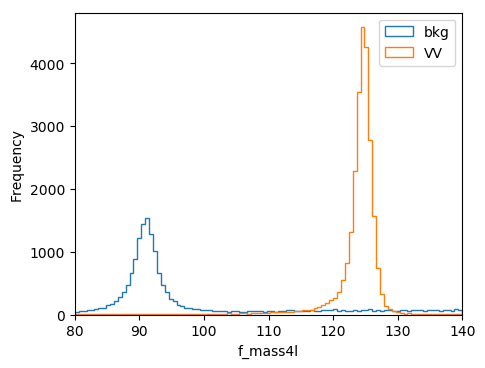

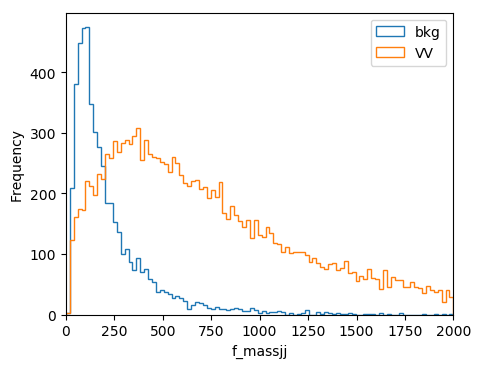

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[0])
bins = np.linspace(80, 140, 100)
df['bkg'][VARS[0]].plot.hist(bins, alpha=1, label='bkg',histtype='step')
df['VV'][VARS[0]].plot.hist(bins, alpha=1, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.xlim(80,140)
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[1])
bins = np.linspace(0, 2000, 100)
df['bkg'][VARS[1]].plot.hist(bins, alpha=1, label='bkg',histtype='step')
df['VV'][VARS[1]].plot.hist(bins, alpha=1, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.xlim(0,2000)